In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


[ 5. 10. 15. 20. 25. 30.]
[336.7676767676768, 586.2020202020202, 916.3939393939394, 1427.7070707070707, 1588.5757575757575, 1783.4848484848485]
[3.9101739423147444, 3.7469982544409866, 6.137841198840639, 27.334904805251696, 15.488080075531604, 12.678115747871885]


Text(0, 0.5, 'Duration(μs)')

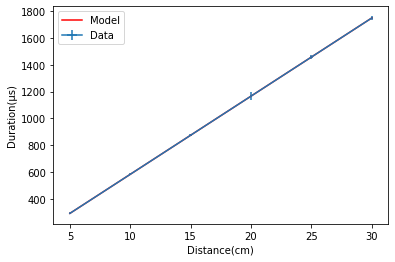

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

distance = np.array([5.0, 10.0, 15.0, 20.0, 25.0, 30.0])
print(distance)
duration_model = distance * 2 / (34300) * (10**6) #distance is multiplied by two because the wave has to bounce back
duration_data = np.loadtxt("/content/drive/My Drive/2A data - Sheet1.csv", delimiter = ",")
duration_5 = np.mean(duration_data[:, 0])
duration_5_std = np.std(duration_data[:, 0])

duration_10 = np.mean(duration_data[:, 1])
duration_10_std = np.std(duration_data[:, 1])

duration_15 = np.mean(duration_data[:, 2])
duration_15_std = np.std(duration_data[:, 2])

duration_20 = np.mean(duration_data[:, 3])
duration_20_std = np.std(duration_data[:, 3])

duration_25 = np.mean(duration_data[:, 4])
duration_25_std = np.std(duration_data[:, 4])

duration_30 = np.mean(duration_data[:, 5])
duration_30_std = np.std(duration_data[:, 5])

duration  = [duration_5, duration_10, duration_15, duration_20, duration_25, duration_30]
duration_std = [duration_5_std, duration_10_std, duration_15_std, duration_20_std, duration_25_std, duration_30_std]
print(duration)
print(duration_std)

plt.plot(distance, duration_model, color = 'red', label = 'Model')
#plt.scatter(distance, duration, label = 'Data')
plt.errorbar(distance, duration_model, xerr = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1], yerr = duration_std, label = 'Data') 
#std too small
plt.legend()
plt.xlabel('Distance(cm)')
plt.ylabel('Duration(μs)')

In [ ]:
results, cov = np.polyfit(distance, duration, 1, cov = True)
#gives a polynomial model to fit data based on degree 1 or 2 etc.
slope = results[0]
print("Slope:"  + str(slope))
slope_variance = cov[0,0]
#error = 0.07945460796909123
error = np.sqrt(slope_variance) / np.abs(slope)
print("Error : " + str(error))

#speed of sound
#325.5m/s
#slope = duration/distance = t/d but distance should be doubled so slope = t/2d -> v = d/t = 1/slope = 2d/t
#error: 5.25%
 
intercept = results[1]
intercept_variance = cov[1,1]/100

model_for_data = slope * distance + intercept
error_model_for_data = (slope + slope_variance) * distance + intercept + intercept_variance



Slope:61.44011544011545
Error : 0.07945460796909123


Text(0, 0.5, 'Duration(μs)')

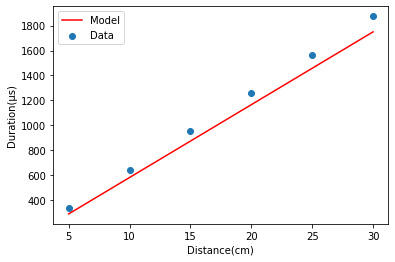

In [ ]:
plt.plot(distance, duration_model, color = 'red', label = 'Model')
#plt.plot(distance, model_for_data, color = 'green', label = 'My data')
plt.scatter(distance, model_for_data, label = 'Data')
#plt.errorbar(distance, duration_model, xerr = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1], yerr = duration_std, label = 'Data') 
#plt.errorbar(distance, model_for_data, xerr = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1], yerr = error_model_for_data, label = 'Data') 

#std too small
plt.legend()
plt.xlabel('Distance(cm)')
plt.ylabel('Duration(μs)')

Text(0.5, 1.0, 'Distance vs. Time(~30cm)')

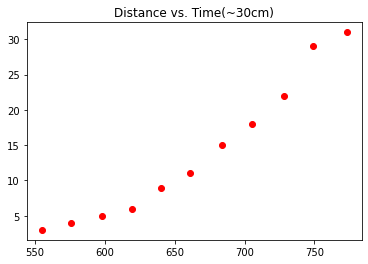

In [ ]:
#accelerating portion one dataset
one_data = np.loadtxt("/content/drive/My Drive/2B Tests/2B Data - Sheet6.csv", delimiter = ',')
one_data_times = one_data[:,0]
one_data_distances = one_data[:,1]
plt.scatter(one_data_times, one_data_distances, color = 'red')
plt.title("Distance vs. Time(~30cm)")

Gravity/Acceleration 9.805760451933887
-0.5159692699201359
138.2311063708354


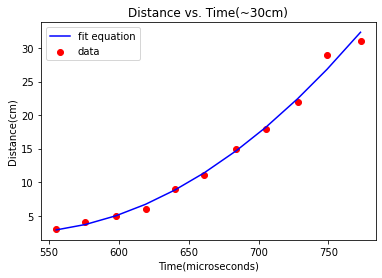

In [ ]:
#polyfit data for equation
fall_equation, fall_cov = np.polyfit(one_data_times, one_data_distances, 2, cov = True)
#fall equation is in quadratic format: 1/2at^2 + voT + initial height 
print("Gravity/Acceleration " + str((fall_equation[0] * 2 * (10**4))))
print(fall_equation[1])
print(fall_equation[2])

y_equ = fall_equation[0] * (one_data_times ** 2) + fall_equation[1] * one_data_times + fall_equation[2]
plt.plot(one_data_times, y_equ, color = 'blue', label = 'fit equation')
plt.scatter(one_data_times, one_data_distances, color = 'red', label = 'data')
plt.title("Distance vs. Time(~30cm)")
plt.xlabel("Time(microseconds)")
plt.ylabel("Distance(cm)")
plt.legend()

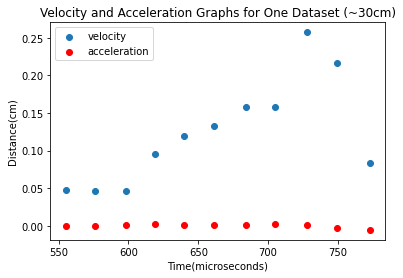

Gravity using velocity polyfit: 6.877195710135121
0.06675549052240616
Gravity using acceleration polyfit: 8.653150035391267
0.0022458981721546808


In [ ]:
#calculate derivative 
dxdt = np.gradient(one_data_distances, one_data_times)
d2xdt = np.gradient(dxdt, one_data_times)
plt.scatter(one_data_times, dxdt, label = 'velocity')
plt.scatter(one_data_times, d2xdt, color = 'red', label = 'acceleration') #constant acceleration
plt.title('Velocity and Acceleration Graphs for One Dataset (~30cm)')
plt.xlabel("Time(microseconds)")
plt.ylabel("Distance(cm)")
plt.legend()
plt.show()

velocity = np.polyfit(one_data_times, dxdt, 1)
acceleration = np.polyfit(one_data_times, d2xdt, 0)
print("Gravity using velocity polyfit: " + str (velocity[0] * (10**4)))
print(np.std(dxdt))
print("Gravity using acceleration polyfit: " + str(acceleration[0] * (10 ** 5) * -1))
print(np.std(d2xdt))

In [ ]:
import numpy as np
#average gravity calculation
data1 = np.loadtxt("/content/drive/My Drive/2B Tests/2B Data - Sheet2 (1).csv", delimiter = ',')
data2 = np.loadtxt("/content/drive/My Drive/2B Tests/2B Data - Sheet3.csv", delimiter = ',')
data3 = np.loadtxt("/content/drive/My Drive/2B Tests/2B Data - Sheet4.csv", delimiter = ',')
data4 = np.loadtxt("/content/drive/My Drive/2B Tests/2B Data - Sheet5.csv", delimiter = ',')
data5 = np.loadtxt("/content/drive/My Drive/2B Tests/2B Data - Sheet6.csv", delimiter = ',')
# data6 = np.loadtxt("/content/drive/My Drive/2B Tests/2B Data - Sheet7.csv", delimiter = ',')
# data7 = np.loadtxt("/content/drive/My Drive/2B Tests/2B Data - Sheet8.csv", delimiter = ',')
# data8 = np.loadtxt("/content/drive/My Drive/2B Tests/2B Data - Sheet9.csv", delimiter = ',')
# data9 = np.loadtxt("/content/drive/My Drive/2B Tests/2B Data - Sheet10.csv", delimiter = ',')

fall_equation1 = np.polyfit(data1[:,0], data1[:,1], 2)
#fall_equation2 = np.polyfit(data2[:,0], data2[:,1], 2)
fall_equation2 = [8.6051812300201 / 2 / (10**4)]
fall_equation3 = np.polyfit(data3[:,0], data3[:,1], 2)
fall_equation4 = np.polyfit(data4[:,0], data4[:,1], 2)
fall_equation5 = np.polyfit(data5[:,0], data5[:,1], 2)

# print("G(1): " + str((fall_equation1[0] * 2 * (10**4))))
# print("G(2): " + str((fall_equation2[0] * 2 * (10**4))))
# print("G(3): " + str((fall_equation3[0] * 2 * (10**4))))
# print("G(4): " + str((fall_equation4[0] * 2 * (10**4))))
# print("G(5): " + str((fall_equation5[0] * 2 * (10**4))))

average_g = (fall_equation1[0] + fall_equation2[0] + fall_equation3[0] + fall_equation4[0] + fall_equation5[0])/5
print("Average(G): " + str((average_g * 2 * (10**4))))

average_g_std = np.std(np.array([fall_equation1[0] * 2 * (10**4), fall_equation2[0] * 2 * (10**4),fall_equation3[0] * 2 * (10**4), fall_equation4[0] * 2 * (10**4), fall_equation5[0]]* 2 * (10**4)))
print("Average std: " + str(0.674230115013437))

print("np.polyfit: " + str(fall_equation5[0] * (10**4)) + " " + str(fall_equation5[1]) + " " + str(fall_equation[2]) + " ")
grad = np.gradient(data1[:,1], data1[:,0])
grad2 = np.gradient(grad, data1[:,0])
print(grad2)
print(np.mean(grad))
print(np.std(grad))



Average(G): 9.854490115563658
Average std: 0.674230115013437
np.polyfit: 4.9028802259669435 -0.5159692699201359 138.2311063708354 
[-0.00108225 -0.00164914 -0.00061843  0.00163596  0.00099173 -0.00013771
  0.00125493  0.00124339  0.00108167  0.00098333  0.00084829  0.00040404
  0.0237037   0.04676329  0.04716733]
0.3164345817382124
0.6045028155733876
